In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, make_scorer, accuracy_score
from sklearn.svm import SVC

In [2]:
news = pd.read_csv('Fake.br-Corpus.csv', sep=',')

In [3]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(news['preprocessed_news'])
tfidf_dataframe = pd.DataFrame(tfidf_matrix.toarray(),columns=vectorizer.get_feature_names_out())

In [4]:
svm = SVC(kernel='linear', gamma='auto')
labels = news['label']

In [5]:
originalclass = []
predictedclass = []

def classification_report_folds(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    print(classification_report(y_true, y_pred,digits=4))
    return accuracy_score(y_true, y_pred)

In [6]:
scores = cross_val_score(svm, tfidf_dataframe, labels, cv=10, \
    scoring=make_scorer(classification_report_folds))

              precision    recall  f1-score   support

        fake     0.9671    0.9806    0.9738       360
        true     0.9803    0.9667    0.9734       360

    accuracy                         0.9736       720
   macro avg     0.9737    0.9736    0.9736       720
weighted avg     0.9737    0.9736    0.9736       720

              precision    recall  f1-score   support

        fake     0.9669    0.9722    0.9695       360
        true     0.9721    0.9667    0.9694       360

    accuracy                         0.9694       720
   macro avg     0.9695    0.9694    0.9694       720
weighted avg     0.9695    0.9694    0.9694       720

              precision    recall  f1-score   support

        fake     0.9405    0.9667    0.9534       360
        true     0.9657    0.9389    0.9521       360

    accuracy                         0.9528       720
   macro avg     0.9531    0.9528    0.9528       720
weighted avg     0.9531    0.9528    0.9528       720

              preci

In [7]:
# Average over cross-validation folds
classification_report_folds(originalclass, predictedclass)

              precision    recall  f1-score   support

        fake     0.9612    0.9692    0.9651      7200
        true     0.9689    0.9608    0.9649      7200

    accuracy                         0.9650     14400
   macro avg     0.9650    0.9650    0.9650     14400
weighted avg     0.9650    0.9650    0.9650     14400



0.965

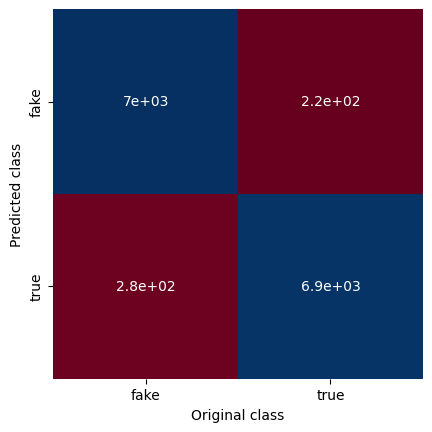

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(originalclass, predictedclass)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=labels.unique(),
            yticklabels=labels.unique())

plt.xlabel("Original class")
plt.ylabel("Predicted class")
plt.show()